In [59]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Q1.Create a file “Person.txt” with the following data: 
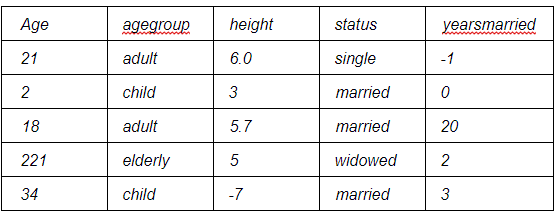



i) Read the data from the file “Person.txt”.  


In [60]:
data=pd.read_table("/content/gdrive/MyDrive/people.txt",delim_whitespace=True)
print(data)

   Age agegroup  height   status  yearsmarried
0   21    adult     6.0   single            -1
1    2    child     3.0  married             0
2   18    adult     5.7  married            20
3  221  elderly     5.0  widowed             2
4   34    child     7.0  married             3


ii) Create a rule set E that contain rules to check for the following conditions : 

1. The age should be in the range 0-150. 

In [61]:
def check_age_range(data):
  age_range = lambda r: r in range(151) #r>=0 and r<=150
  return data['Age'].apply(age_range).rename('Check Age Range')

2. The age should be greater than years married. 

In [62]:
def check_age(data):
  age_limit = lambda r: r[0] > r[4]
  return data.apply(age_limit,axis=1).rename("Check Age")

3. The status should be married or single or widowed. 


In [63]:
def check_status(data):
  status_value= lambda r: r in data["status"].values
  return data['status'].apply(status_value).rename("Check status")

4. If age is less than 18 the age group should be child, if age is between 18 and 65 the age group should be adult, if age is more than 65 the age group should be elderly. 

In [80]:
def check_age_group(data):
  age_group = lambda x: (x[0] in range(18) and x[1]=="child") or (x[0] in range(18,66) and x[1]=="adult") or (x[0]>65 and x[1]=="elderly")
  return data[['Age', 'agegroup']].apply(age_group, axis =1).rename("Check age group")

In [81]:
E={"check_age_range":check_age_range, "check_age_limit":check_age, "check_status_value":check_status, "check_age_group":check_age_group}
result=list()
for i in E.keys():
 #print(E[i](data))
  result.append(E[i](data))

iii) Check whether rule set E is violated by the data in the file people.txt.

In [94]:
print(result)
for i in result:
  print(logical_and(result[i]))

                    0     1      2      3      4
Check Age Range  True  True   True  False   True
Check Age        True  True  False   True   True
Check status     True  True   True   True   True
Check age group  True  True   True   True  False


NameError: ignored

iv) Summarize the results obtained in part(iii) 

In [93]:
result=pd.DataFrame(result)
#print(result)
print(result.describe())

           0     1     2     3     4
count      4     4     4     4     4
unique     1     1     2     2     2
top     True  True  True  True  True
freq       4     4     3     3     3


v) Visualize the results obtained in part(iii)

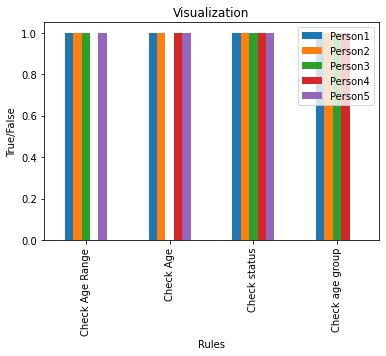

In [88]:
import matplotlib.pyplot as plt
result.astype(int).plot(kind='bar')
plt.title("Visualization")
plt.xlabel('Rules')
plt.ylabel('True/False')
plt.legend(['Person1','Person2','Person3','Person4','Person5'])